# 2.1 파이토치 개요

2.1.1 파이토치 특징 및 장점

In [ ]:
import torch
torch.tensor([[1., -1.], [1., -1.]])

tensor([[ 1., -1.],
        [ 1., -1.]])

# 2.2 파이토치 기초 문법

2.2.1 텐서 다루기

In [ ]:
print(torch.cuda.is_available())

False


In [ ]:
import torch
print(torch.tensor([[1, 2], [3,4]])) #2차원 텐서 생성
print(torch.tensor([[1,2],[3,4]], device="cuda:0")) #GPU에 텐서 생성
print(torch.tensor([[1,2],[3,4]], dtype=torch.float64)) #dtype을 이용하여 텐서 생성

tensor([[1, 2],
        [3, 4]])


RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

In [ ]:
temp = torch.tensor([[1,2],[3,4]])
print(temp.numpy())

temp = torch.tensor([[1,2],[3,4]], device="cuda:0")
print(temp.to("cpu").numpy())

[[1 2]
 [3 4]]


RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

In [ ]:
temp = torch.FloatTensor([1, 2, 3, 4, 5, 6, 7])  #파이토치로 1차원 벡터 생성
print(temp[0], temp[1], temp[-1])  #인덱스로 접근
print('----------------------')
print(temp[2:5], temp[4:-1])  #슬라이스로 접근

tensor(1.) tensor(2.) tensor(7.)
----------------------
tensor([3., 4., 5.]) tensor([5., 6.])


In [ ]:
v = torch.tensor([1, 2, 3])  #길이가 3인 벡터 생성
w = torch.tensor([3, 4, 6])
print(w -v)

tensor([2, 2, 3])


In [ ]:
temp = torch.tensor([
    [1,2], [3,4]])  #2x2 행렬 생성
print(temp.shape)
print('----------------------')
print(temp.view(4,1))  # 2x2 행렬을 4x1로 변형
print('----------------------')
print(temp.view(-1))  #2x2 행렬을 1차원 벡터로 변형
print('----------------------')
print(temp.view(1, -1))
print('----------------------')
print(temp.view(-1, 1))

torch.Size([2, 2])
----------------------
tensor([[1],
        [2],
        [3],
        [4]])
----------------------
tensor([1, 2, 3, 4])
----------------------
tensor([[1, 2, 3, 4]])
----------------------
tensor([[1],
        [2],
        [3],
        [4]])


2.2.2 데이터 준비

In [ ]:
!pip install pandas

In [ ]:
import pandas as pd
import torch
data = pd.read_csv('../class2.csv')  #길벗 홈페이지에서 다운받은 파일 내에서는 class2.csv를 찾지 못해 교재와 동일한 경로로 적음

x= torch.from_numpy(data['x'].values).unsqueeze(dim=1).float()  #CSV 파일의 x 칼럼의 값을 넘파이 배열로 받아 Tensor(dtype)으로 바꾸어 줌.
y=torch.from_numpy(data['y'].values).unsqueeze(dim=1).float()

FileNotFoundError: [Errno 2] No such file or directory: '../class2.csv'

In [ ]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

class CustomDataset(torch.utils.data.Dataset):
  def __init__(self, csv_file):  #csv_file 파라미터로 데이터셋 불러옴
    self.label = pd.read_csv(csv_file)

  def __len__(self):  #크기 반환
    return len(self.label)

  def __getitem__(self, idx):  #idx번째 데이터 가져옴
    sample = torch.tensor(self.label.iloc[idx,0:3]).int()
    label = torch.tensor(self.label.iloc[idx,3]).int()
    return sample, label

In [ ]:
tensor_dataset = CustomDataset('../covtype.csv')  #class2.csv와 마찬가지로 다운받지 못하여 교재와 동일한 경로로 작성.
datset = DataLoader(tensor_dataset, batch_size=4, shuffle=True)

In [ ]:
!pip install requests

In [ ]:
import torchvision.transforms as transforms

mnist_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (1.0,))
])

from torchvision.datasets import MNIST
import requests
download_root = '../chap02/data/MNIST_DATASET'  #내려받을 경로 지정해주기

In [ ]:
train_dataset = MNIST(download_root, transform=mnist_transform, train=True, download=True)
valid_dataset = MNIST(download_root, transform=mnist_transform, train=False, download=True)
test_dataset = MNIST(download_root, transform=mnist_transform, train=False, download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 133521672.19it/s]


Extracting ../chap02/data/MNIST_DATASET/MNIST/raw/train-images-idx3-ubyte.gz to ../chap02/data/MNIST_DATASET/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 23682442.59it/s]

Extracting ../chap02/data/MNIST_DATASET/MNIST/raw/train-labels-idx1-ubyte.gz to ../chap02/data/MNIST_DATASET/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 92711290.10it/s]

Extracting ../chap02/data/MNIST_DATASET/MNIST/raw/t10k-images-idx3-ubyte.gz to ../chap02/data/MNIST_DATASET/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 7315871.26it/s]

Extracting ../chap02/data/MNIST_DATASET/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../chap02/data/MNIST_DATASET/MNIST/raw



2.2.3 모델 정의

In [ ]:
import torch.nn as nn
model = nn.Linear(in_features=1, out_features=1, bias=True)

In [ ]:
from torch.nn import Module, Linear, Sigmoid
class MLP(Module):
  def __init__(self, inputs):
    super(MLP, self).__init__()
    self.layer = Linear(inputs, 1)  #계층 정의해줌
    self.activation = Sigmoid()  #활성함수를 정의

  def forward(self, X):
    X = self.layer(X)
    X = self.activation(X)
    return X

In [ ]:
class MLP(nn.Module):
  def __init__(self):
    super(MLP, self).__init__()
    self.layer1 = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(2))

    self.layer2 = nn.Sequential(
        nn.Conv2d(in_channels=64, out_channels=30, kernel_size=5),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(2))

    self.layer3 = nn.Sequential(
        nn.Linear(in_features=30*5*5, out_features=10, bias=True),
        nn.ReLU(inplace=True))

    def forward(self, x):
      x = self.layer1(x)
      x = self.layer2(x)
      x = x.view(x.shape[0], -1)
      x= self.layer3(x)
      return x

model = MLP()

print("Printing children\n--------------------")
print(list(model.children()))
print("\n\nPrinting Modules\n--------------------")
print(list(model.modules()))

Printing children
--------------------
[Sequential(
  (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Linear(in_features=750, out_features=10, bias=True)
  (1): ReLU(inplace=True)
)]


Printing Modules
--------------------
[MLP(
  (layer1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Linear(in_features=750, o

In [ ]:
def MLP(in_features=1, hidden_features=20, out_features=1):
  hidden = nn.Linear(in_features=in_features, out_features=hidden_features, bias=True)
  activation = nn.ReLU()
  output = nn.Linear(in_features=hidden_features, out_features=out_features, bias=True)
  net = nn.Sequential(hidden, activation, output)
  return net

2.2.4 모델의 파라미터 정의

In [ ]:
from torch.optim import optimizer
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer=optimizer, lr_lambda=lambda epoch: 0.95 ** epoch)

for epoch in range(1, 100+1):  #에포크 수만큼 데이터 반복.
  for x, y in dataloader:  #배치 크기만큼 데이터 가져옴.
    optimizer.zero_grad()
loss_fn(model(x), y).backward()
optimizer.step()
scheduler.step()

TypeError: 'type' object is not iterable

2.2.5 모델 훈련

In [ ]:
for epoch in range(100):
  yhat = model(x_train)
  loss = criterion(yhat, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

NameError: name 'x_train' is not defined

2.2.6 모델 평가

In [ ]:
!pip install torchmetrics

In [ ]:
import torch
import torchmetrics

pred = torch.randn(10, 5).softmax(dim=-1)
target = torch.randint(5, (10,))

acc = torchmetrics.functional.accuracy(preds, target)

NameError: name 'preds' is not defined

In [ ]:
metric = torchmetrics.Accuracy()  #모델 정확도 초기화하기 위한 코드

n_batches = 10
for i in range(n_batches):
  preds = torch.randn(10, 5).softmax(dim=-1)
  target = torch.randint(5, (10,))

  acc = metric(preds, target)
  print(f"Accuracy on batch {i}: {acc}")  #현 배치에서의 모델 평가와

acc = metric.compute()
print(f"Accuracy on all data: {acc}")  #모든 배치에서 모델 평가 모두 나타내줌

2.2.7 훈련 과정 모니터

In [ ]:
! pip install tensorboard

In [ ]:
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter('../chap02/tensorboard')  #모니터링에 필요한 값들을 저장할 위치

In [ ]:
for epoch in range(num_epochs):
  model.train()  #학습 모드
  batch_loss = 0.0

  for i, (x, y) in enumerate(dataloader):
    x, y = x.to(device).float(), y.to(device).float()
    outputs = model(x)
    loss = criterion(outputs, y)
    writer.add_scalar("Loss", loss, epoch)  #스칼라 값(오차)을 기록
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

writer.close()  #SummaryWriter가 더 이상 필요하지 않으면 close() 멤서드 호출

NameError: name 'num_epochs' is not defined

In [ ]:
!tensorboard --logdir=../chap02/tensorboard --port=6006

2.4 파이토치 코드 맛보기

In [ ]:
!pip install matplotlib

In [ ]:
!pip install seaborn

In [ ]:
!pip install scikit-learn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
dataset = pd.read_csv('/content/car_evaluation.csv')
dataset.head()

,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


<Axes: ylabel='count'>

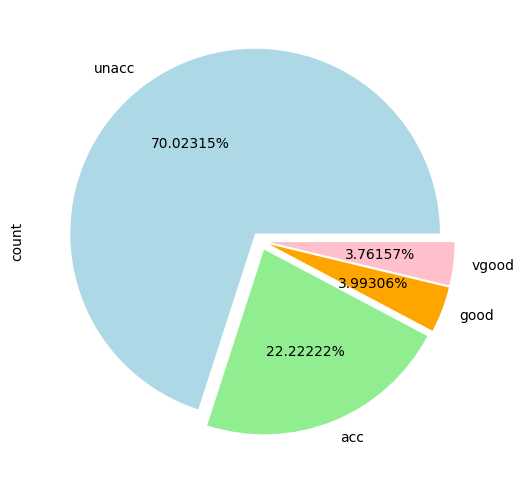

In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
dataset.output.value_counts().plot(kind='pie', autopct='%0.05f%%', colors=['lightblue', 'lightgreen', 'orange', 'pink'], explode=(0.05, 0.05, 0.05,0.05))

In [ ]:
categorical_columns = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety']

In [ ]:
for category in categorical_columns:
    dataset[category] = dataset[category].astype('category')

price = dataset['price'].cat.codes.values
maint = dataset['maint'].cat.codes.values
doors = dataset['doors'].cat.codes.values
persons = dataset['persons'].cat.codes.values
lug_capacity = dataset['lug_capacity'].cat.codes.values
safety = dataset['safety'].cat.codes.values

categorical_data = np.stack([price, maint, doors, persons, lug_capacity, safety], 1)
categorical_data[:10]

array([[3, 3, 0, 0, 2, 1],
       [3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       [3, 3, 0, 0, 1, 1],
       [3, 3, 0, 0, 1, 2],
       [3, 3, 0, 0, 1, 0],
       [3, 3, 0, 0, 0, 1],
       [3, 3, 0, 0, 0, 2],
       [3, 3, 0, 0, 0, 0],
       [3, 3, 0, 1, 2, 1]], dtype=int8)

In [ ]:
categorical_data = torch.tensor(categorical_data, dtype=torch.int64)
categorical_data[:10]

tensor([[3, 3, 0, 0, 2, 1],
        [3, 3, 0, 0, 2, 2],
        [3, 3, 0, 0, 2, 0],
        [3, 3, 0, 0, 1, 1],
        [3, 3, 0, 0, 1, 2],
        [3, 3, 0, 0, 1, 0],
        [3, 3, 0, 0, 0, 1],
        [3, 3, 0, 0, 0, 2],
        [3, 3, 0, 0, 0, 0],
        [3, 3, 0, 1, 2, 1]])

In [ ]:
outputs = pd.get_dummies(dataset.output)
outputs = outputs.values
outputs = torch.tensor(outputs).flatten()

print(categorical_data.shape)
print(outputs.shape)

torch.Size([1728, 6])
torch.Size([6912])


In [ ]:
categorical_column_sizes = [len(dataset[column].cat.categories) for column in categorical_columns]
categorical_embedding_sizes = [(col_size, min(50, (col_size+1)//2)) for col_size in categorical_column_sizes]
print(categorical_embedding_sizes)

[(4, 2), (4, 2), (4, 2), (3, 2), (3, 2), (3, 2)]


In [ ]:
total_records = 1728
test_records = int(total_records * .2)

categorical_train_data = categorical_data[:total_records-test_records]
categorical_test_data = categorical_data[total_records-test_records:total_records]
train_outputs = outputs[:total_records-test_records]
test_outputs = outputs[total_records-test_records:total_records]

In [ ]:
print(len(categorical_train_data))
print(len(train_outputs))
print(len(categorical_test_data))
print(len(test_outputs))

1383
1383
345
345


In [ ]:
class Model(nn.Module):
    def __init__(self, embedding_size, output_size, layers, p=0.4):
        super().__init__()
        self.all_embeddings = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in embedding_size])
        self.embedding_dropout = nn.Dropout(p)

        all_layers = []
        num_categorical_cols = sum((nf for ni, nf in embedding_size))
        input_size = num_categorical_cols

        for i in layers:
            all_layers.append(nn.Linear(input_size, i))
            all_layers.append(nn.ReLU(inplace=True))
            all_layers.append(nn.BatchNorm1d(i))
            all_layers.append(nn.Dropout(p))
            input_size = i

        all_layers.append(nn.Linear(layers[-1], output_size))
        self.layers = nn.Sequential(*all_layers)

    def forward(self, x_categorical):
        embeddings = []
        for i,e in enumerate(self.all_embeddings):
            embeddings.append(e(x_categorical[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.embedding_dropout(x)
        x = self.layers(x)
        return x

In [ ]:
model = Model(categorical_embedding_sizes, 4, [200,100,50], p=0.4)
print(model)

Model(
  (all_embeddings): ModuleList(
    (0-2): 3 x Embedding(4, 2)
    (3-5): 3 x Embedding(3, 2)
  )
  (embedding_dropout): Dropout(p=0.4, inplace=False)
  (layers): Sequential(
    (0): Linear(in_features=12, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=50, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.4, inplace=False)
    (12): Linear(in_features=50, out_features=4, bias=True)
  )
)


In [ ]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

In [ ]:
epochs = 500
aggregated_losses = []
train_outputs = train_outputs.to(device=device, dtype=torch.int64)
for i in range(epochs):
    i += 1
    y_pred = model(categorical_train_data).to(device)
    single_loss = loss_function(y_pred, train_outputs)
    aggregated_losses.append(single_loss)

    if i%25 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

    optimizer.zero_grad()
    single_loss.backward()
    optimizer.step()

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

epoch:   1 loss: 1.48969460
epoch:  26 loss: 1.31063426
epoch:  51 loss: 1.22864938
epoch:  76 loss: 1.14944029
epoch: 101 loss: 1.02787697
epoch: 126 loss: 0.89607853
epoch: 151 loss: 0.81320834
epoch: 176 loss: 0.74252695
epoch: 201 loss: 0.68143427
epoch: 226 loss: 0.65019035
epoch: 251 loss: 0.63054103
epoch: 276 loss: 0.60479099
epoch: 301 loss: 0.60108995
epoch: 326 loss: 0.59503770
epoch: 351 loss: 0.58749640
epoch: 376 loss: 0.58151317
epoch: 401 loss: 0.58672583
epoch: 426 loss: 0.57518286
epoch: 451 loss: 0.57072222
epoch: 476 loss: 0.57055449
epoch: 500 loss: 0.5649136901


In [ ]:
test_outputs = test_outputs.to(device=device, dtype=torch.int64)
with torch.no_grad():
    y_val = model(categorical_test_data).to(device)
    loss = loss_function(y_val, test_outputs)
print(f'Loss: {loss:.8f}')

Loss: 0.55942118


In [ ]:
print(y_val[:5])

tensor([[ 7.8796,  5.0702, -6.8704, -9.0715],
        [ 3.5934,  2.0637, -4.3973, -4.4428],
        [ 4.8422,  3.0947, -5.6316, -6.2601],
        [ 5.2610,  3.4310, -5.1516, -5.1008],
        [ 2.6768,  1.8716, -3.4778, -3.5720]])


In [ ]:
y_val = np.argmax(y_val.cpu().numpy(), axis=1)
print(y_val[:5])

[0 0 0 0 0]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

test_outputs=test_outputs.cpu().numpy()
print(confusion_matrix(test_outputs,y_val))
print(classification_report(test_outputs,y_val))
print(accuracy_score(test_outputs, y_val))

[[257   2]
 [ 85   1]]
              precision    recall  f1-score   support

           0       0.75      0.99      0.86       259
           1       0.33      0.01      0.02        86

    accuracy                           0.75       345
   macro avg       0.54      0.50      0.44       345
weighted avg       0.65      0.75      0.65       345

0.7478260869565218
